In [18]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('tips.csv')

data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Sun": 0, "Sat": 1, "Thur": 2, "Fri": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})

figure = px.scatter(
    data_frame=data,
    x="total_bill",
    y="tip",
    size="size",  # Parti büyüklüğünü belirler
    color="day",  # Renk günlere göre belirlenir
    symbol="smoker",  # Sigara içme durumuna göre sembol farklılaştırılır
    hover_name="sex",  # Hover sırasında cinsiyet bilgisi gösterilir
    hover_data=["time"],  # Hover sırasında yemek zamanı bilgisi gösterilir
    title="Total Bill vs Tip Analysis",
    labels={"total_bill": "Total Bill ($)", "tip": "Tip ($)", "size": "Party Size", "day": "Day"},
    
)

figure.show()
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 'tip' sütunu ile diğer değişkenler arasındaki korelasyonların hesaplanması
# tip_correlation = data.corr()["tip"].drop("tip")  # 'tip' ile kendisi arasındaki korelasyonu çıkarıyoruz
# print(tip_correlation)

# # Bar grafiğinin çizilmesi
# plt.figure(figsize=(8, 5))
# sns.barplot(x=tip_correlation.index, y=tip_correlation.values, palette="viridis")

# # Grafiğe başlık ve etiketler eklenmesi
# plt.title("Korelasyon Katsayıları (tip ile diğer değişkenler)", fontsize=14)
# plt.ylabel("Korelasyon Katsayısı")
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Grafiğin gösterilmesi
# plt.show()


grafikten bahşişin, sigaradan, cinsiyetten ve günden bağımsız olduğuna kara verdim.

Mean Squared Error:  0.9514183978376526


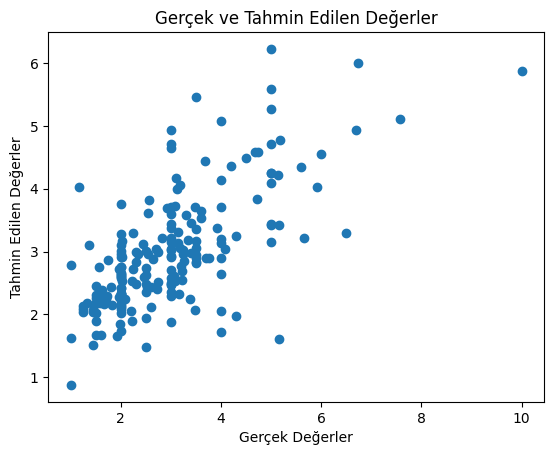

Tahmin Edilen Tip:  2.9172469504078955


In [22]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('tips.csv')

# Kategorik verilerin dönüştürülmesi
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Sun": 0, "Sat": 1, "Thur": 2, "Fri": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})

# Girdilerin ve hedefin belirlenmesi
x = data.drop(columns=["tip"])  
y = data["tip"]

# Eğitim ve test verilerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

# Modelin oluşturulması ve eğitilmesi
model = LinearRegression()
model.fit(x_train, y_train)

# Tahminlerin yapılması
y_pred = model.predict(x_test)

# MSE'nin hesaplanması
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Gerçek ve tahmin edilen değerlerin görselleştirilmesi
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.show()

# Kullanıcıdan girdi alma ve tahmin yapma
total = float(input("Total Bill: "))
sex = float(input("sex (0 for Female, 1 for Male): "))
time = float(input("time (0 for Lunch, 1 for Dinner): "))
size = float(input("size: "))
day = float(input("day (0 for Sun, 1 for Sat, 2 for Thur, 3 for Fri): "))
smoker = float(input("smoker (0 for No, 1 for Yes): "))

# Tahmin için veri çerçevesinin oluşturulması
data_input = pd.DataFrame({
    "total_bill": [total],
    "sex": [sex],
    "smoker": [smoker],
    "day": [day],
    "time": [time],
    "size": [size]
})

# Model ile tahmin yapma
prediction = model.predict(data_input)
print("Tahmin Edilen Tip: ", prediction[0])

